In [56]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('MRTSMPCSM4400CUSN.csv')

In [58]:
df.tail()

,date,realtime_end,value,realtime_start
323,2019-01-01,2019-08-14,-37.9,2019-08-14
324,2019-02-01,2019-08-14,-0.8,2019-08-14
325,2019-03-01,2019-08-14,16.9,2019-08-14
326,2019-04-01,2019-08-14,-3.4,2019-08-14
327,2019-05-01,2019-08-14,8.1,2019-08-14


In [59]:
df.set_index('date', inplace=True)
df.drop(['realtime_end', 'realtime_start'], axis=1, inplace=True)
df.columns = ['value_t1']

In [60]:
df['value_t-15'] = df.value_t1.shift(periods=15)
df['value_t-30'] = df.value_t1.shift(periods=30)
df['value_t-45'] = df.value_t1.shift(periods=45)
df['value_t-60'] = df.value_t1.shift(periods=60)
df.dropna(inplace=True)

In [61]:
df.shape

(268, 5)

In [62]:
df.head()

,value_t1,value_t-15,value_t-30,value_t-45,value_t-60
date,,,,,
1997-02-01,-0.3,20.8,9.8,3.9,3.9
1997-03-01,16.4,45.0,-5.9,-2.1,10.0
1997-04-01,-4.4,-52.8,5.4,1.1,4.7
1997-05-01,9.7,5.7,16.5,5.7,4.1
1997-06-01,-3.6,12.0,49.8,-4.8,-2.9


In [63]:
# variables needed to shape the data and construct the LSTM layer
num_samples = len(df)
num_timesteps = 4 # number of t-s added
num_features = 1 # time is the only features


In [64]:
# reshape
X = df.iloc[:, :4].values
y = df.iloc[:, 4].values

X = X.reshape((X.shape[0], X.shape[1], num_features))


In [65]:
X_train = X[:223,:,:]
X_test = X[223:,:,:]
y_train = y[:223]
y_test = y[223:]
y_test.shape

(45,)

In [66]:
model = Sequential()

model.add(LSTM(100, activation='relu', input_shape=(num_timesteps, num_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [67]:
hist = model.fit(X_train, y_train,
                 epochs=50,
                 batch_size=50,
                 validation_data=(X_test, y_test))

Train on 223 samples, validate on 45 samples
Epoch 1/50
223/223 [==============================] - 3s 13ms/step - loss: 380.3146 - val_loss: 268.3459
Epoch 2/50
223/223 [==============================] - 0s 157us/step - loss: 355.5469 - val_loss: 252.6927
Epoch 3/50
223/223 [==============================] - 0s 269us/step - loss: 321.0451 - val_loss: 227.7782
Epoch 4/50
223/223 [==============================] - 0s 188us/step - loss: 261.3096 - val_loss: 193.6622
Epoch 5/50
223/223 [==============================] - 0s 246us/step - loss: 240.5642 - val_loss: 166.0078
Epoch 6/50
223/223 [==============================] - 0s 229us/step - loss: 184.8458 - val_loss: 129.7826
Epoch 7/50
223/223 [==============================] - ETA: 0s - loss: 184.438 - 0s 202us/step - loss: 127.2377 - val_loss: 77.9393
Epoch 8/50
223/223 [==============================] - 0s 157us/step - loss: 85.6267 - val_loss: 65.4576
Epoch 9/50
223/223 [==============================] - 0s 166us/step - loss: 85.1118 -

# Predictions (version 1)

In [68]:
y_hat_test = model.predict(X_test)
y_hat_train = model.predict(X_train)

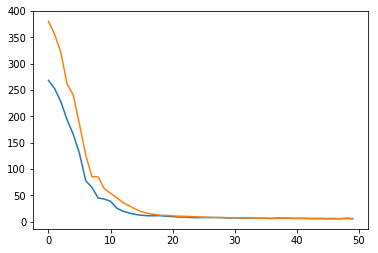

In [70]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])

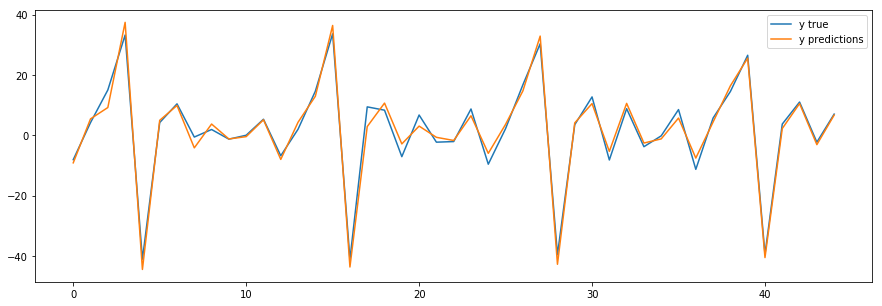

In [77]:
plt.figure(figsize=(15,5))
plt.plot(y_test, label="y true")
plt.plot(y_hat_test, label='y predictions')
plt.legend()

In [72]:
pred_df = pd.DataFrame(np.concatenate([y_hat_train, y_hat_test], axis=0).ravel())
pred_df.index = df.index

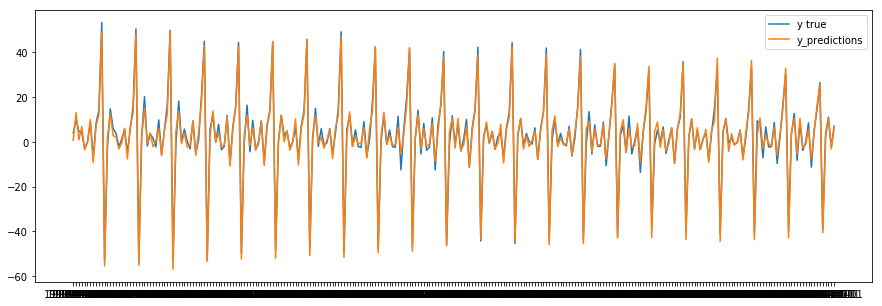

In [78]:
plt.figure(figsize=(15,5))
plt.plot(y, label="y true")
plt.plot(pred_df, label='y_predictions')
plt.legend()